## Datos COVID

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine
from plotnine import *

### 1. Carga de datos

In [3]:
covid = pd.read_pickle('datos_covid.pkl')

In [4]:
covid.shape

(1299030, 8)

In [6]:
covid.describe(include='all')

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
count,1274520,1299030,1299030,1299030,1.299030e+06,1.299030e+06,1.299030e+06,1.299030e+06
unique,52,3,10,NaN,NaN,NaN,NaN,NaN
top,A,H,0-9,NaN,NaN,NaN,NaN,NaN
freq,24510,433010,129903,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2021-02-12 00:00:00.000000256,8.916302e+00,4.002325e-01,3.814539e-02,7.993349e-02
min,NaN,NaN,NaN,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,2020-07-23 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,2021-02-12 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,2021-09-04 00:00:00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,NaN,NaN,NaN,2022-03-27 00:00:00,3.749000e+03,2.710000e+02,3.500000e+01,1.000000e+02


### 2. Vsiualizaciones con ggplot

#### 2.1 Barplot por sexo y edad

In [7]:
covid2 = covid.groupby(['sexo','grupo_edad']).sum(numeric_only=True)
covid2 = pd.DataFrame(covid2.to_records())

In [8]:
covid2

,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,H,0-9,551068,3356,177,15
1,H,10-19,763040,2375,192,15
2,H,20-29,772202,6641,527,78
3,H,30-39,808200,14199,1392,209
4,H,40-49,969947,31562,3690,749
5,H,50-59,705194,46558,7072,2746
6,H,60-69,417976,55989,10651,7444
7,H,70-79,262040,57114,8495,14781
8,H,80+,197154,65760,1409,31312
9,H,NC,1965,130,9,19


In [9]:
mascara_sexo = covid2['sexo'] != 'NC'
mascara_grupo_edad = covid2['grupo_edad'] != 'NC'
covid2 = covid2[mascara_sexo]
covid2 = covid2[mascara_grupo_edad]

C:\Users\pauri\AppData\Local\Temp\ipykernel_14972\1443247527.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [12]:
covid2

,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,H,0-9,551068,3356,177,15
1,H,10-19,763040,2375,192,15
2,H,20-29,772202,6641,527,78
3,H,30-39,808200,14199,1392,209
4,H,40-49,969947,31562,3690,749
5,H,50-59,705194,46558,7072,2746
6,H,60-69,417976,55989,10651,7444
7,H,70-79,262040,57114,8495,14781
8,H,80+,197154,65760,1409,31312
10,M,0-9,519666,2591,130,9


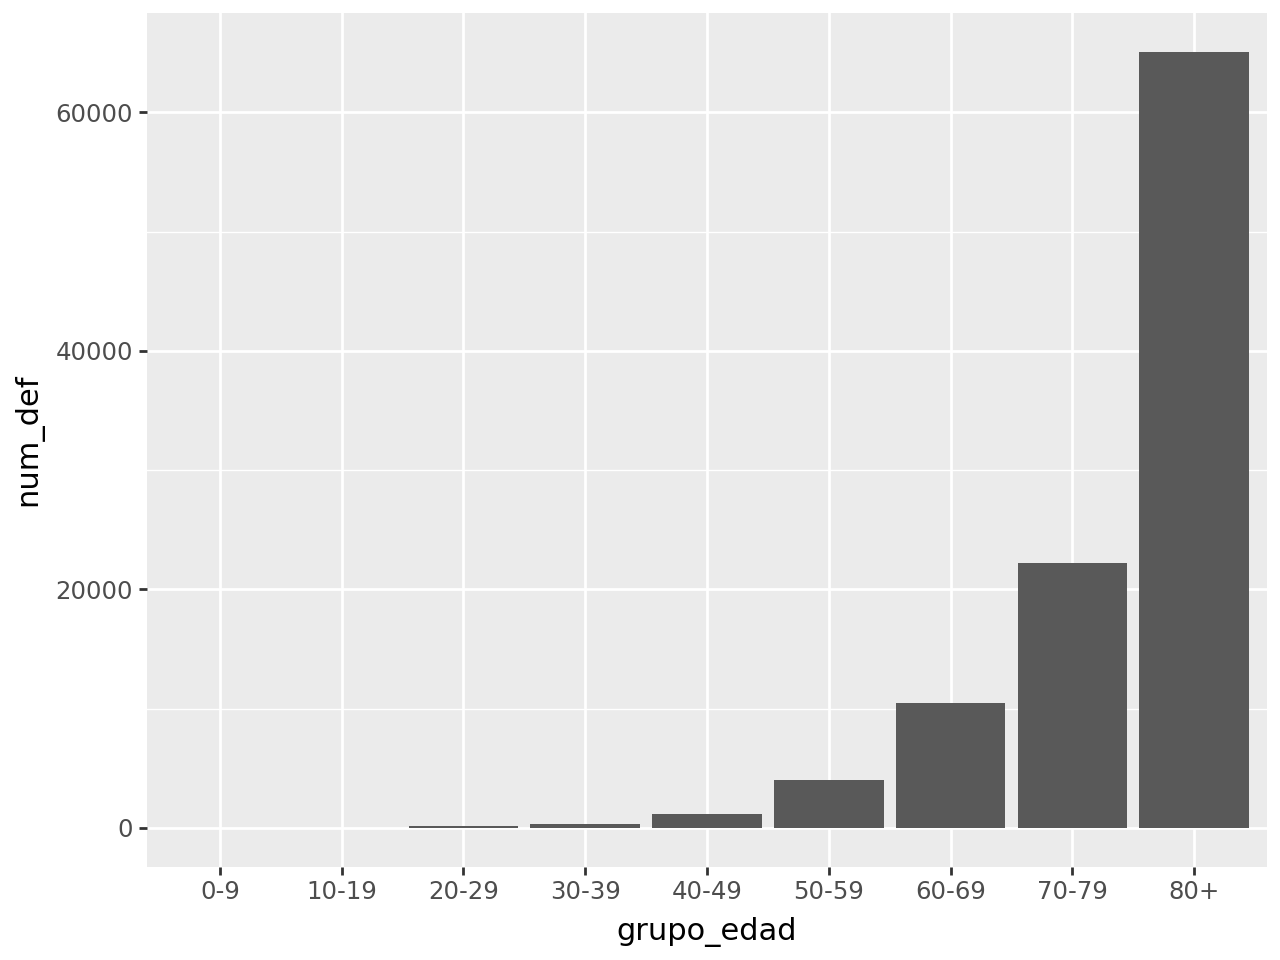

In [14]:
(
    ggplot(covid2)
    + aes(x='grupo_edad',
          y = 'num_def')
          + geom_bar(stat = 'identity')
)

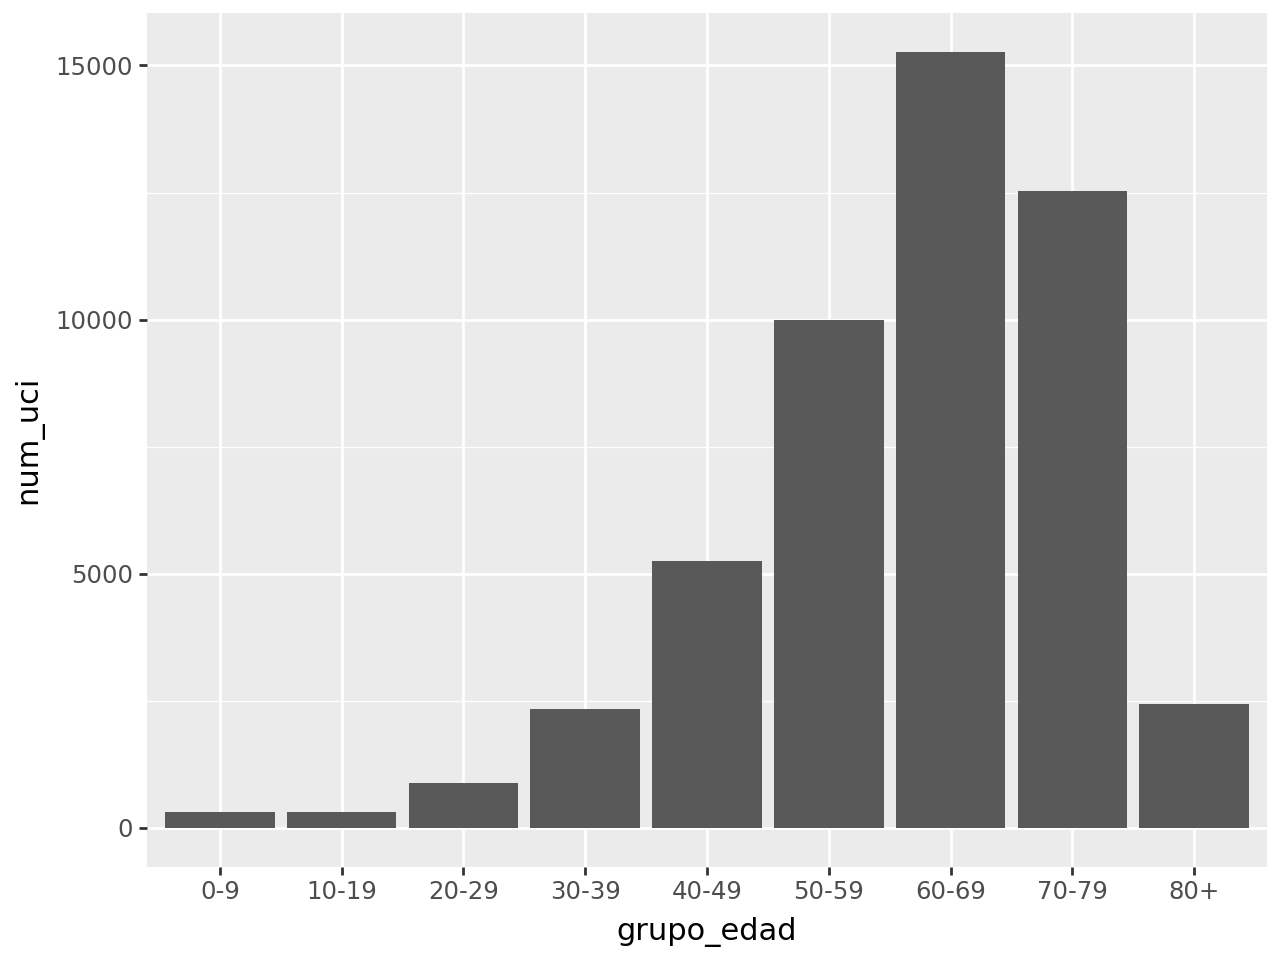

In [17]:
(
    ggplot(covid2)
    + aes(x='grupo_edad',
          y = 'num_uci')
          + geom_bar(stat = 'identity')
)

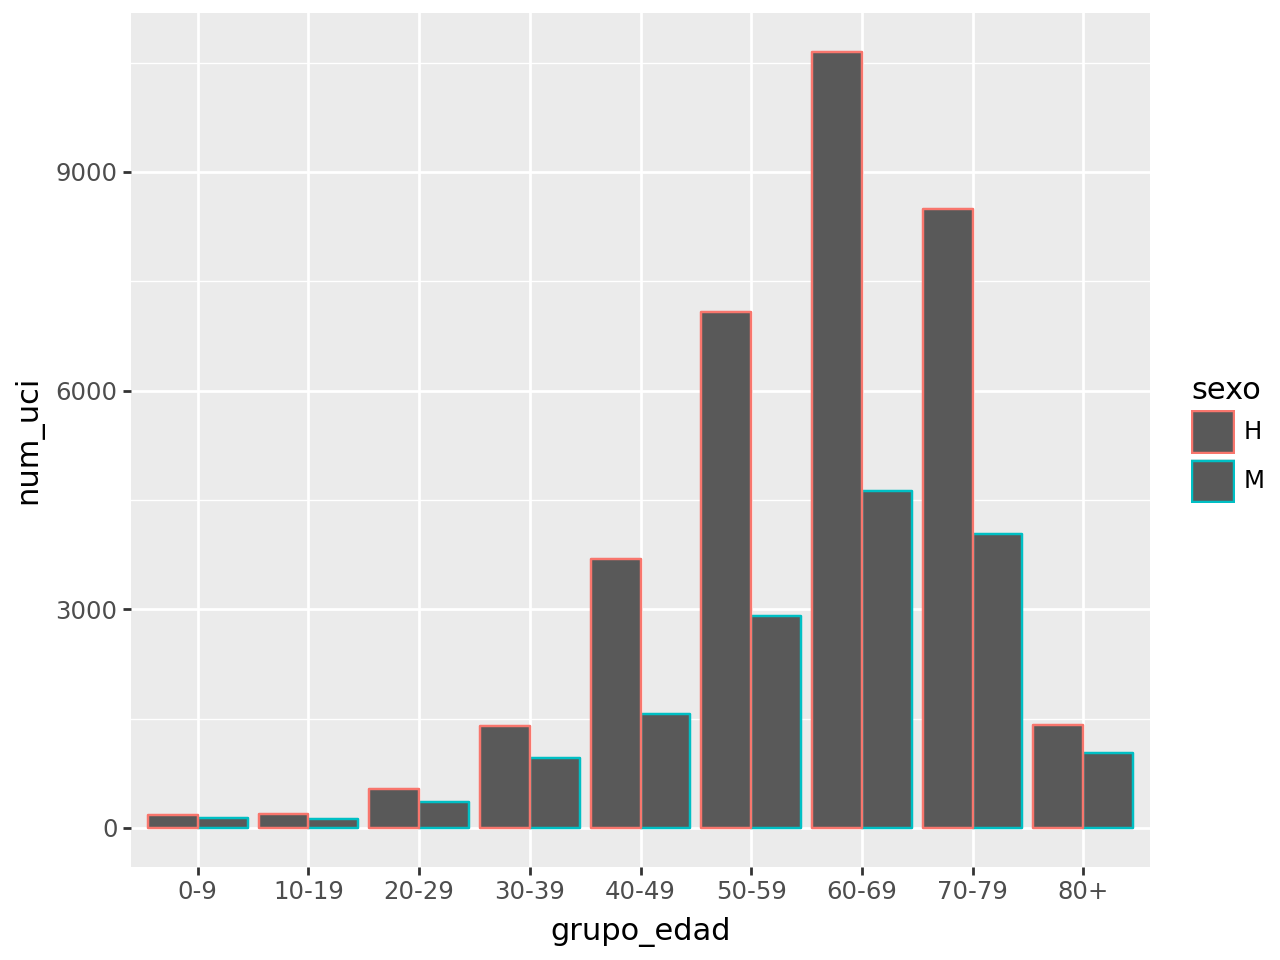

In [23]:
(
    ggplot(covid2)
    + aes(x='grupo_edad',
          y = 'num_uci',
          color='sexo') # nos dibuajara con el controno el color
    + geom_bar(stat = 'identity',
               position = 'dodge') # tener cada uno de los sexos al lado del otor (si pongo stack es encima del otro)
) 

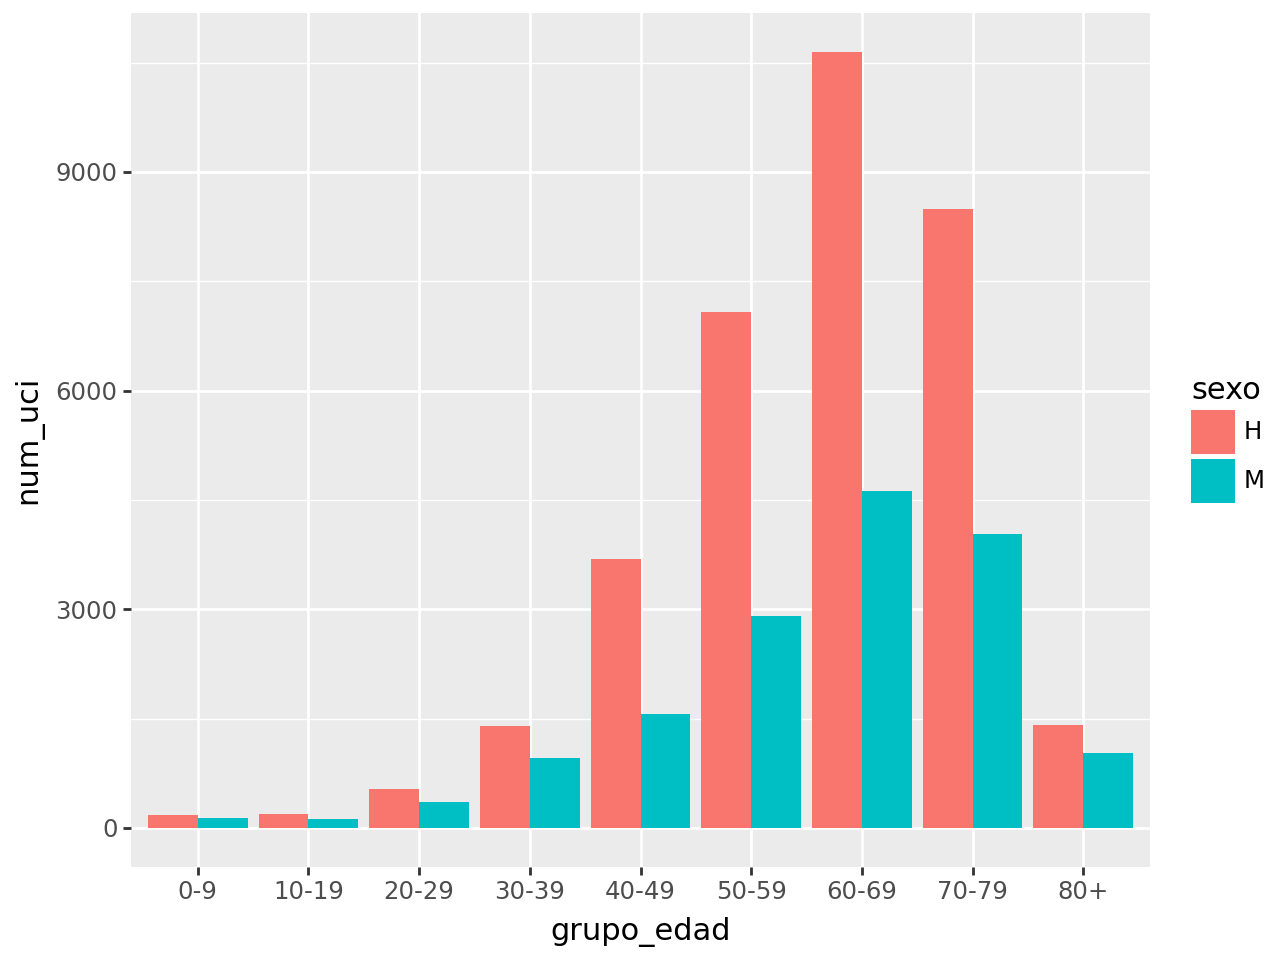

In [26]:
(
    ggplot(covid2)
    + aes(x='grupo_edad',
          y = 'num_uci',
          fill='sexo') # poniendo fill nos sale la barra entera del color del sexo
    + geom_bar(stat = 'identity',
               position = 'dodge') # tener cada uno de los sexos al lado del otor (si pongo stack es encima del otro)
) 

In [28]:
grafico = (
    ggplot(covid2)
    + aes(x='grupo_edad',
          y = 'num_def',
          fill='sexo') # poniendo fill nos sale la barra entera del color del sexo
    + geom_bar(stat = 'identity',
               position = 'dodge') # tener cada uno de los sexos al lado del otor (si pongo stack es encima del otro)
) 

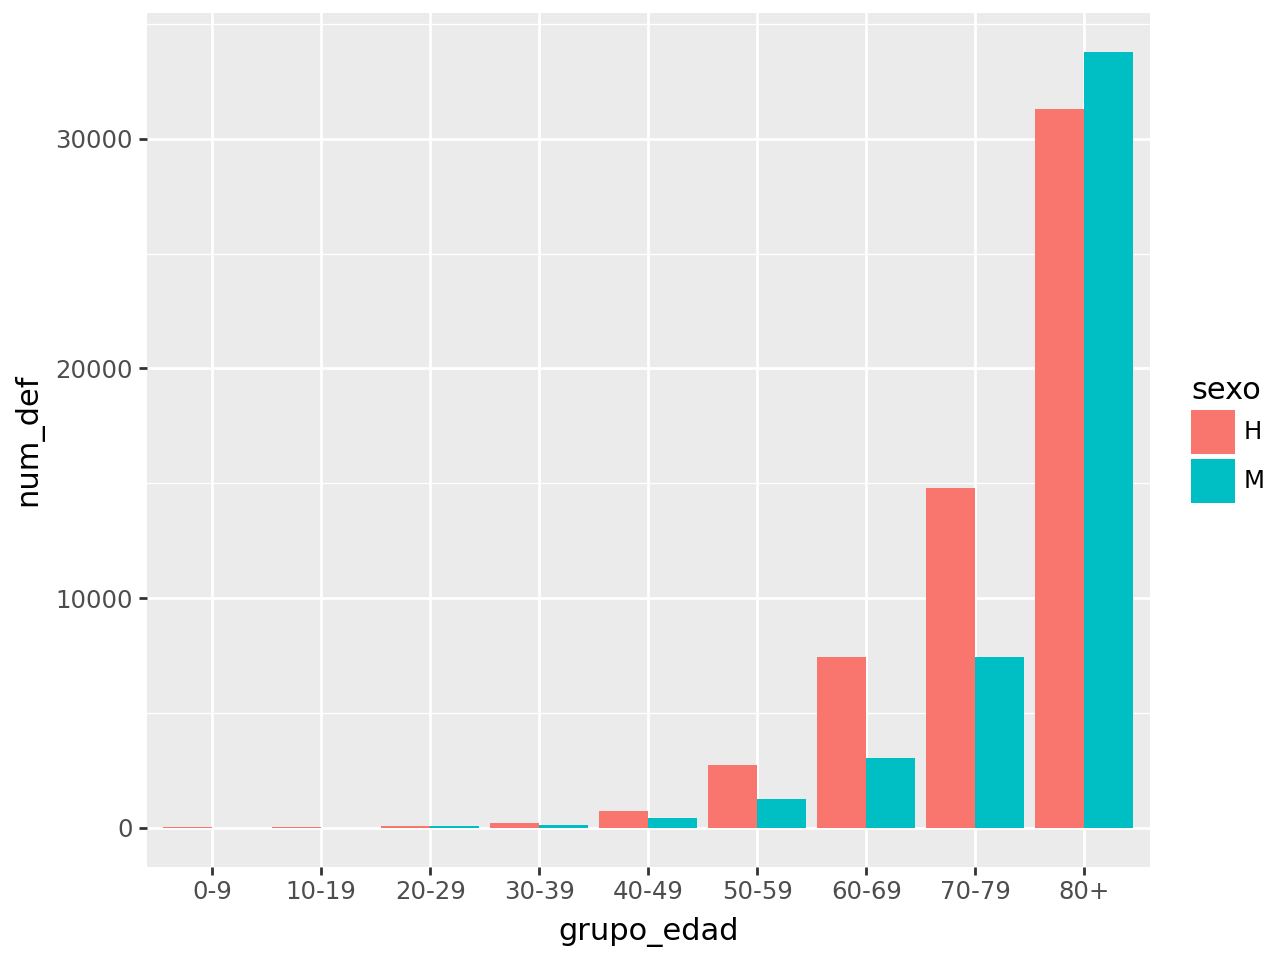

In [29]:
grafico

In [30]:
grafico2 = grafico + (coord_flip())

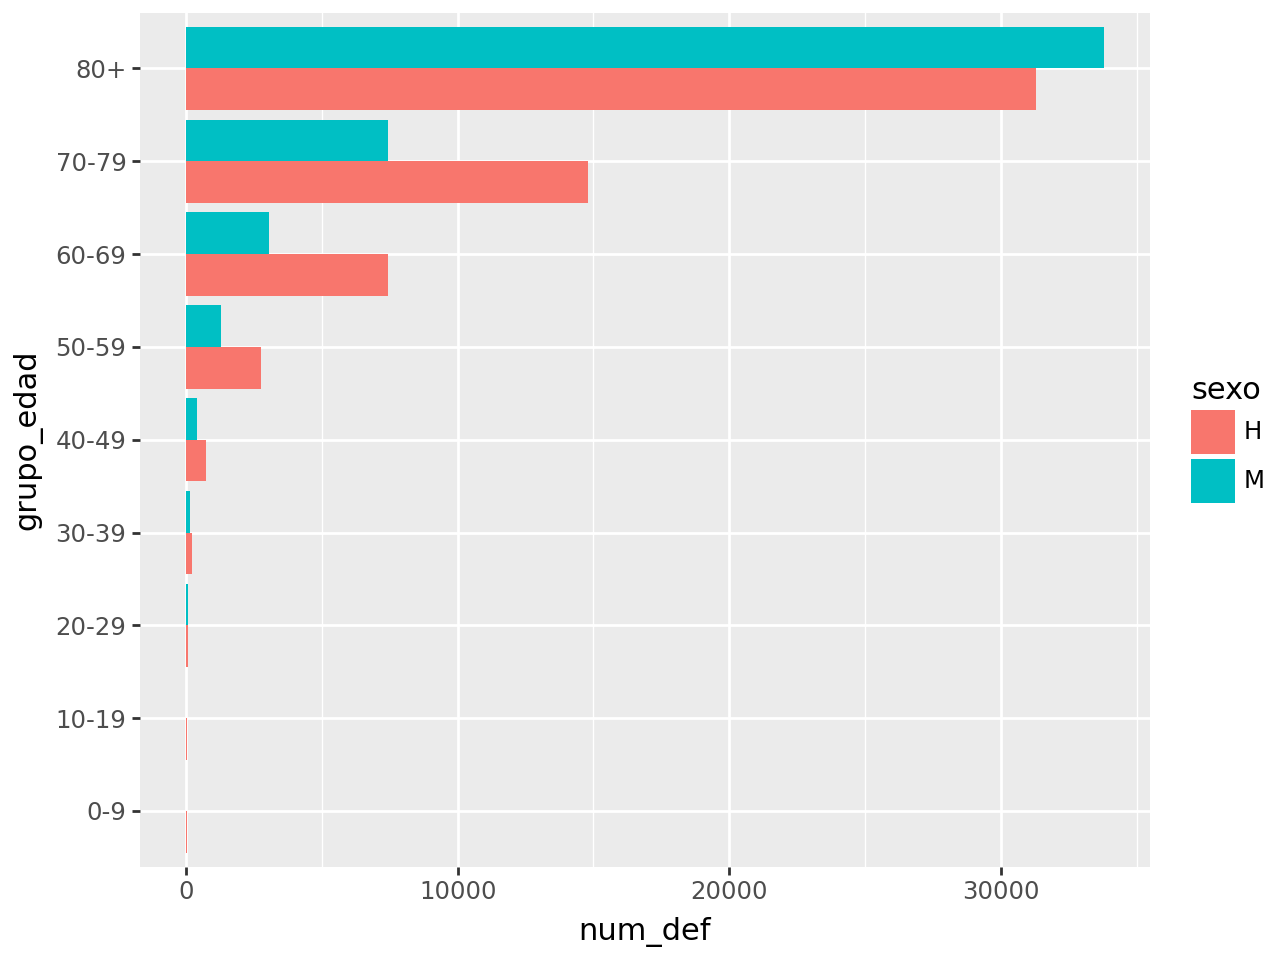

In [31]:
grafico2

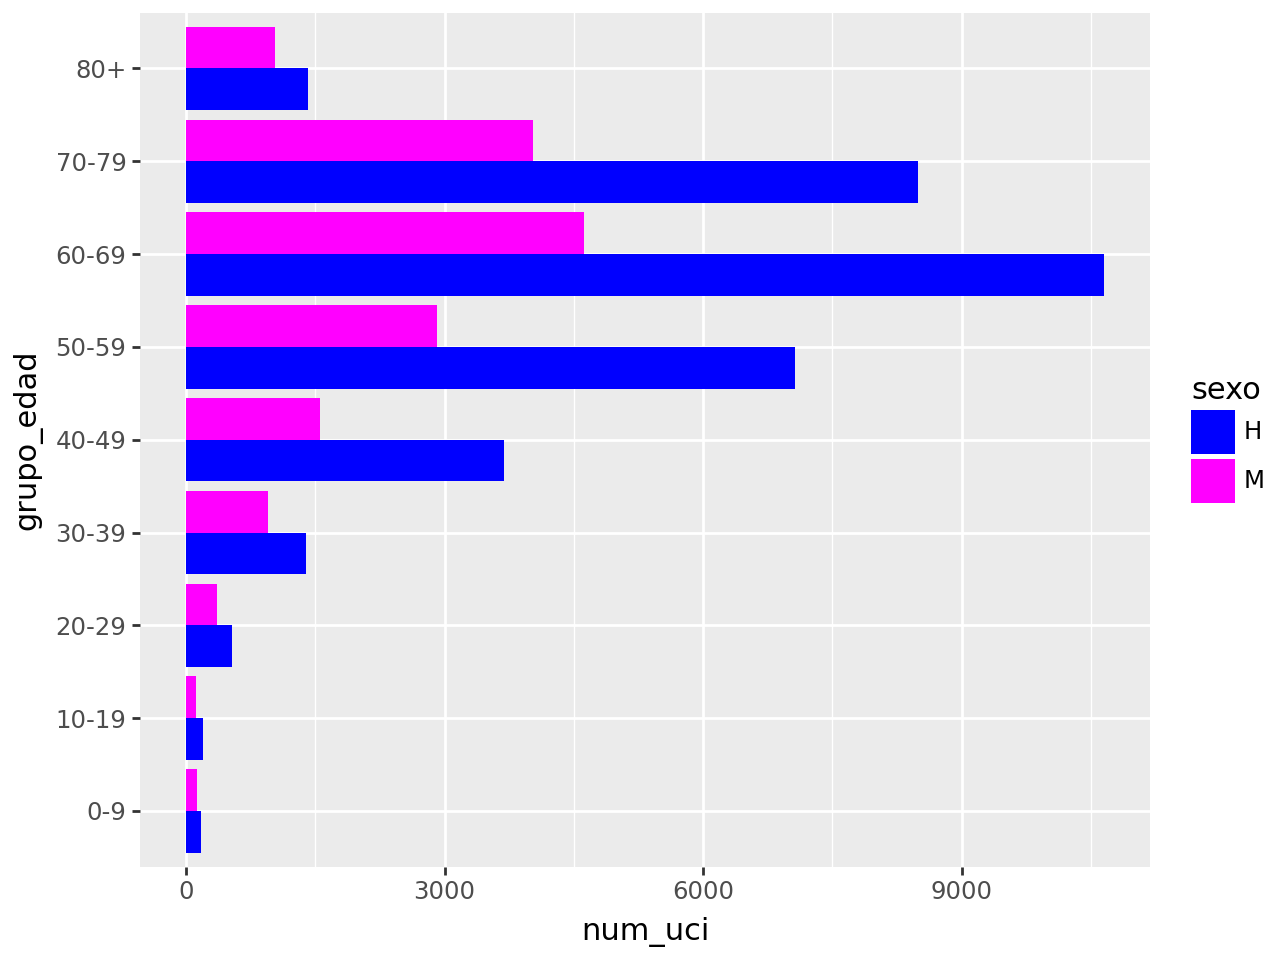

In [35]:
(
    ggplot(covid2)
    + aes(x='grupo_edad',
          y = 'num_uci',
          fill='sexo') # poniendo fill nos sale la barra entera del color del sexo
    + geom_bar(stat = 'identity',
               position = 'dodge')
    + coord_flip()
    + scale_fill_manual(values=('blue','magenta')) # para aplicar el color que queramos
) 

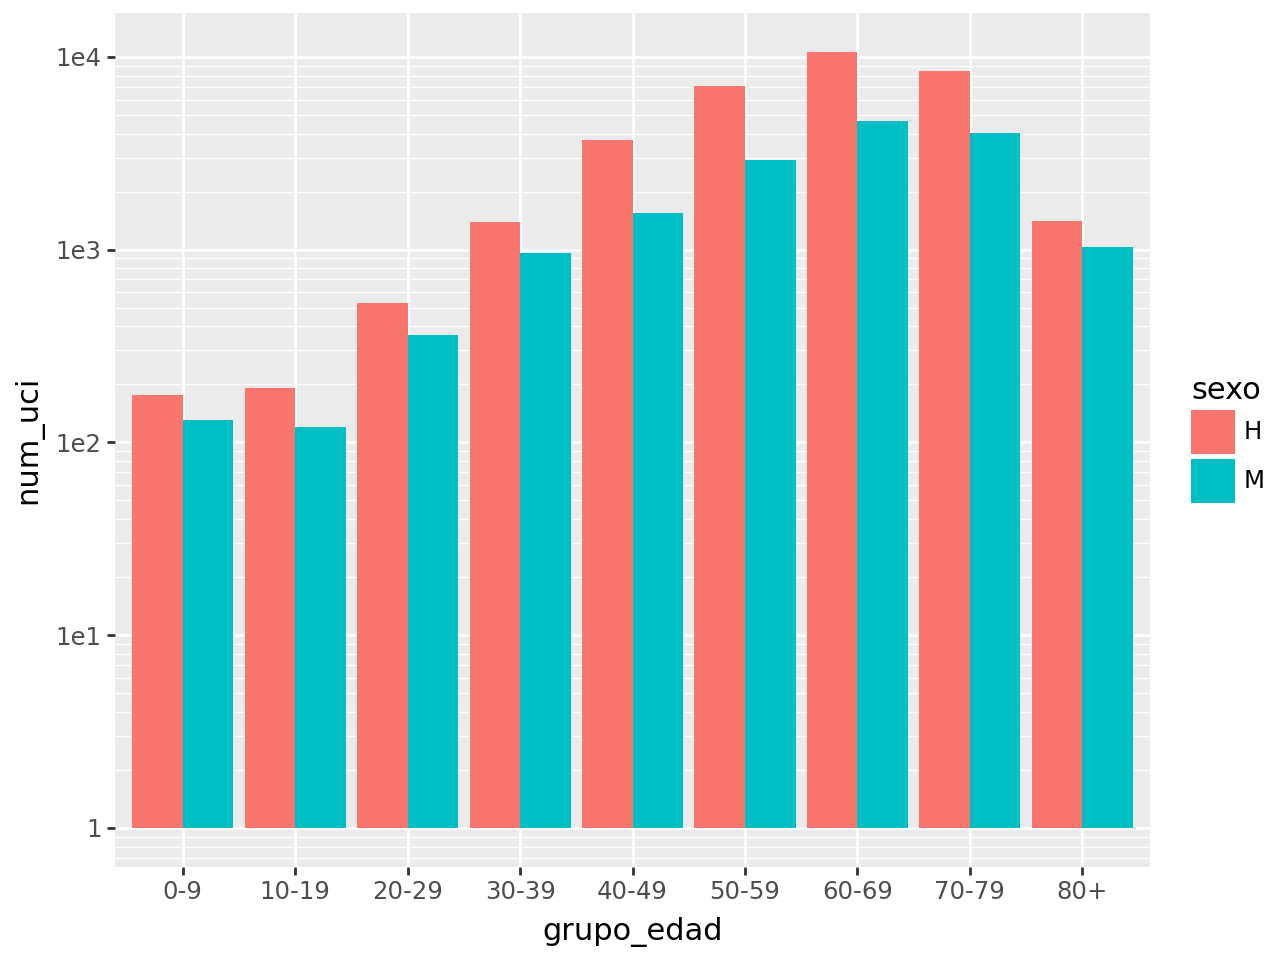

In [36]:
(
    ggplot(covid2)
    + aes(x='grupo_edad',
          y = 'num_uci',
          fill='sexo') # poniendo fill nos sale la barra entera del color del sexo
    + geom_bar(stat = 'identity',
               position = 'dodge')
    + scale_y_log10() # Para aplicarle una escala logaritmica

) 

#### 2.2. Olas (Series Temporales)

In [39]:
covid3 = covid.groupby(['sexo','fecha']).sum(numeric_only=True)
covid3 = pd.DataFrame(covid3.to_records())
mascara_sexo=covid3['sexo'] != 'NC'
covid3 = covid3[mascara_sexo]

In [40]:
covid3.head()

,sexo,fecha,num_casos,num_hosp,num_uci,num_def
0,H,2020-01-01,0,5,0,0
1,H,2020-01-02,0,43,1,0
2,H,2020-01-03,0,2,0,0
3,H,2020-01-04,0,2,0,0
4,H,2020-01-05,0,3,0,0


In [42]:
g = (
    ggplot(covid3)
    + aes( x= 'fecha',
          y = 'num_casos',
          color='sexo')
    + geom_line()
    + theme(axis_text_x = element_text(angle = -45,
                                       hjust = 1,
                                       size = 10))
)

In [43]:
g = g + theme(figure_size=(12,12))

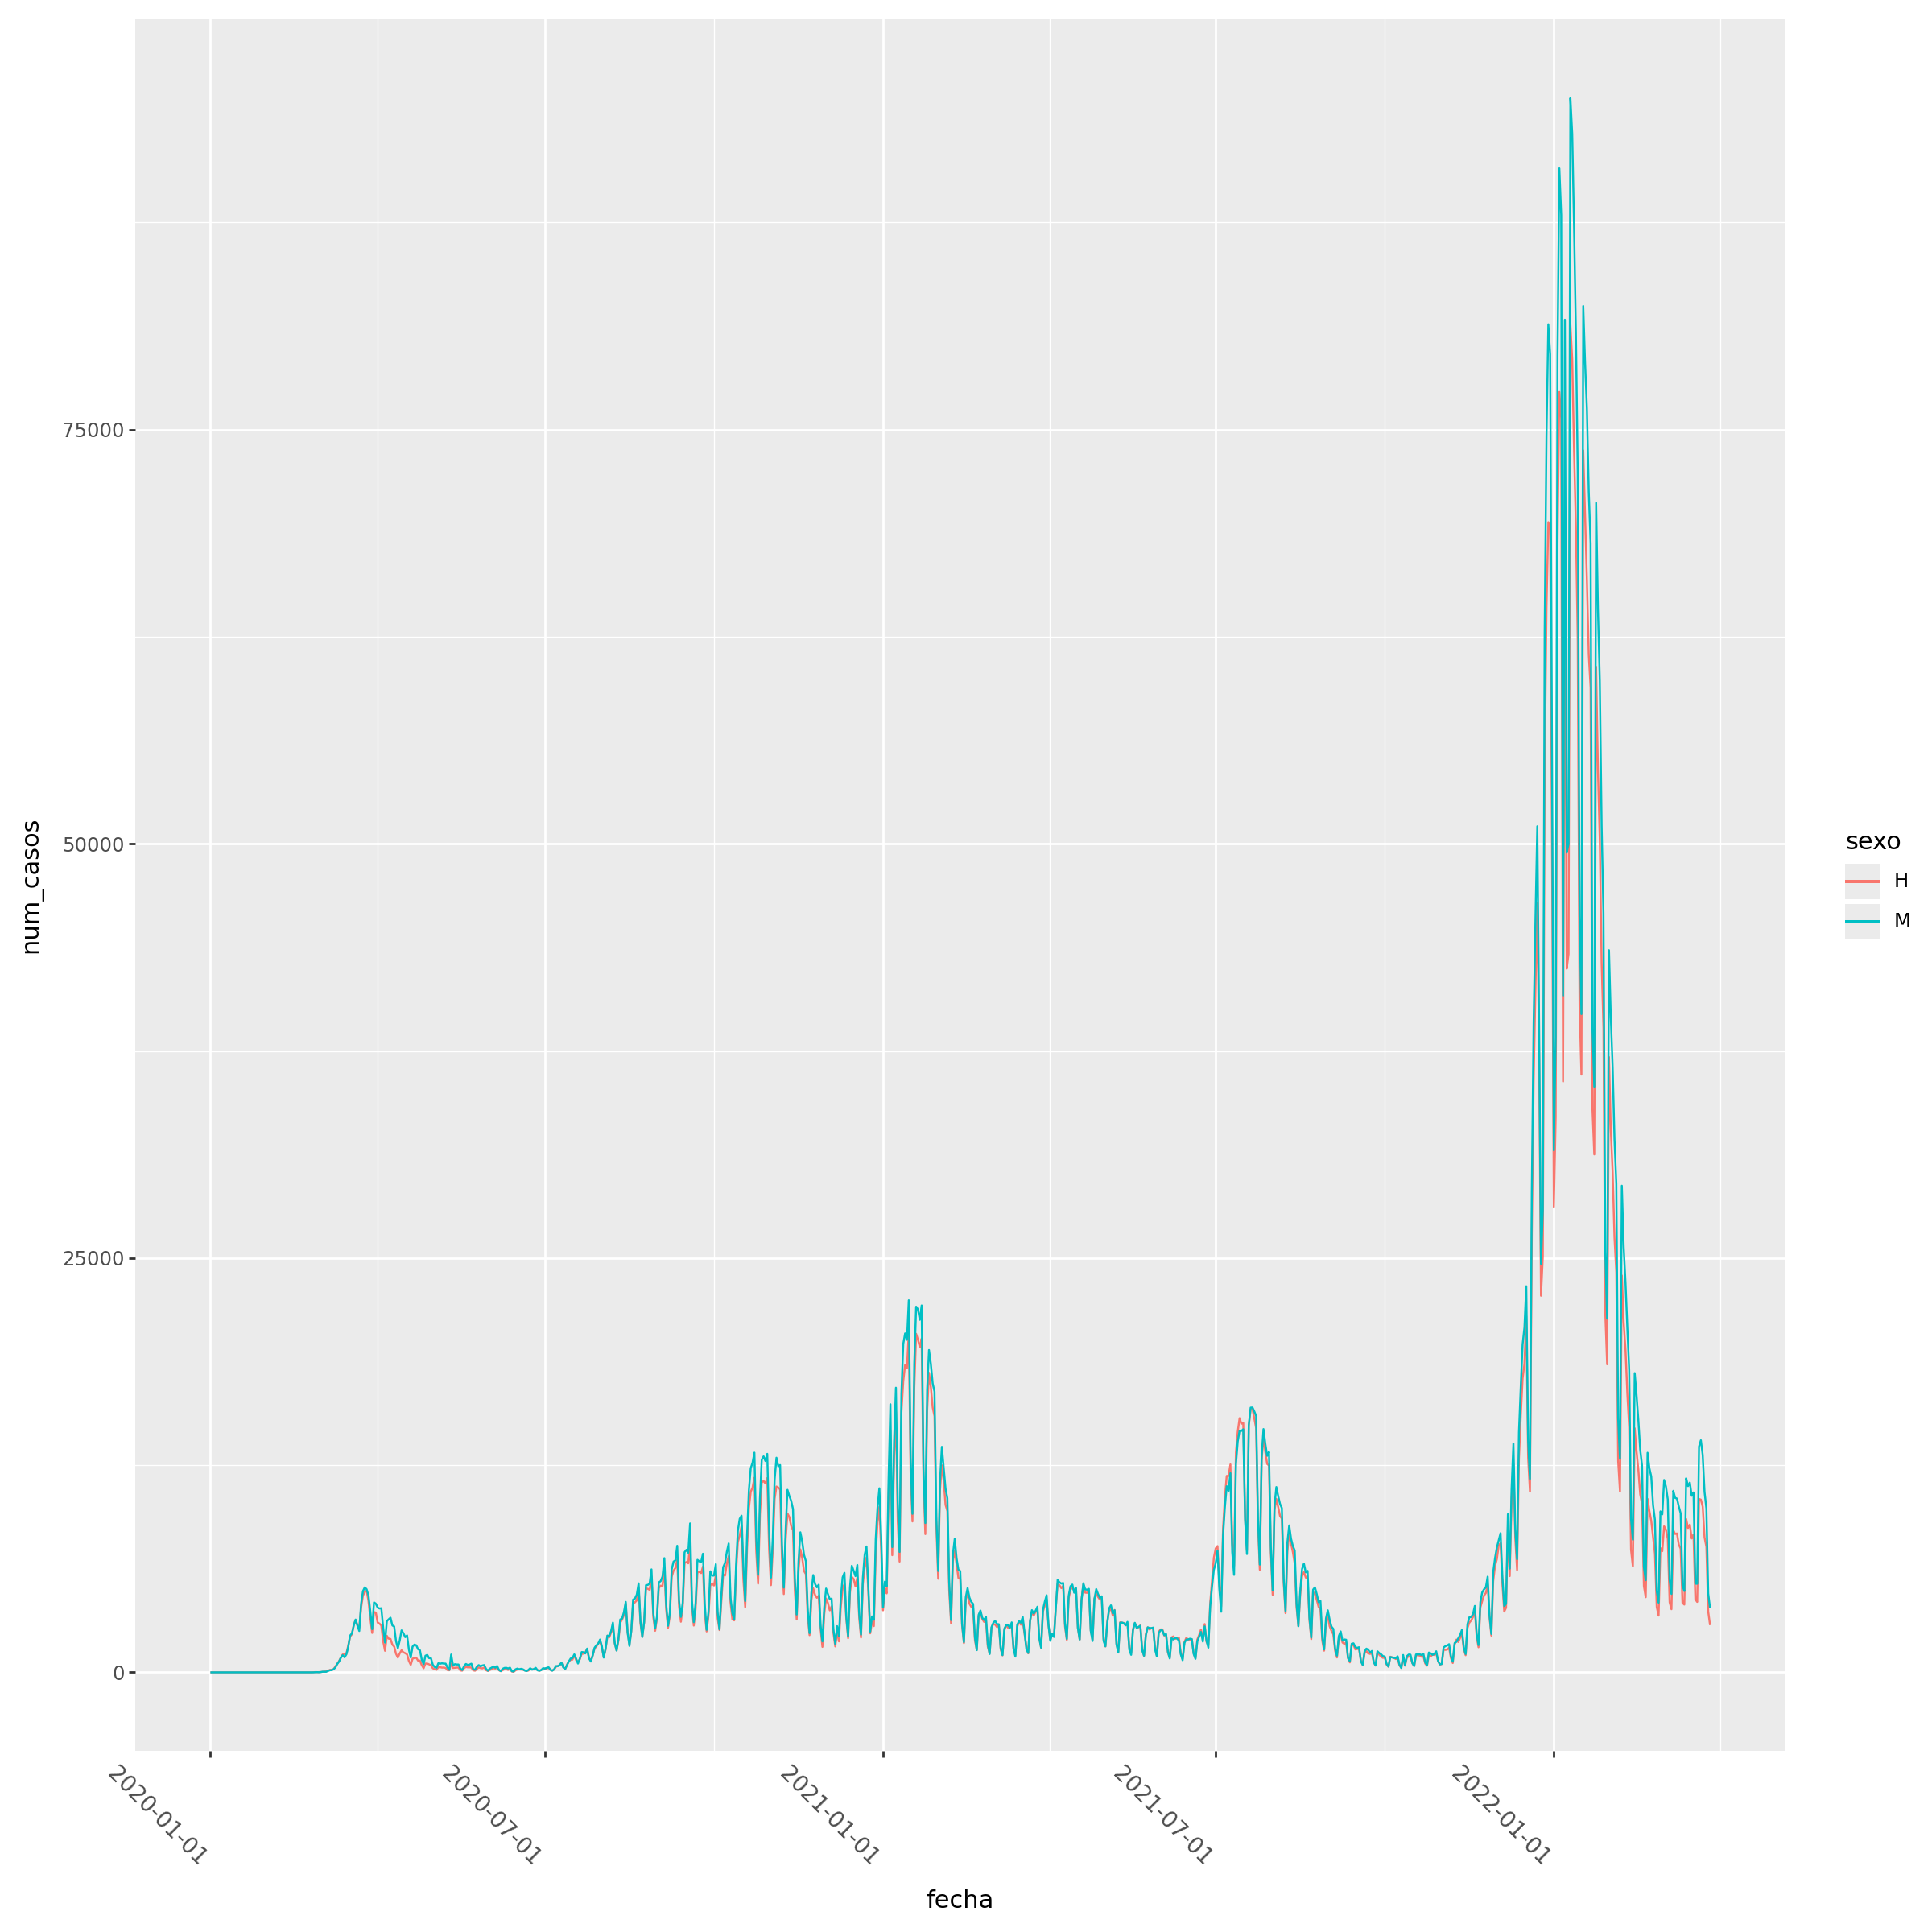

In [44]:
g

In [ ]:
g = (
    ggplot(covid3)
    + aes( x= 'fecha',
          y = 'num_casos',
          color='sexo')
    + geom_smooth(method='lowess', span=0.05) 
)

In [53]:
g = g + theme(figure_size=(12,12))

c:\Users\pauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\pauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


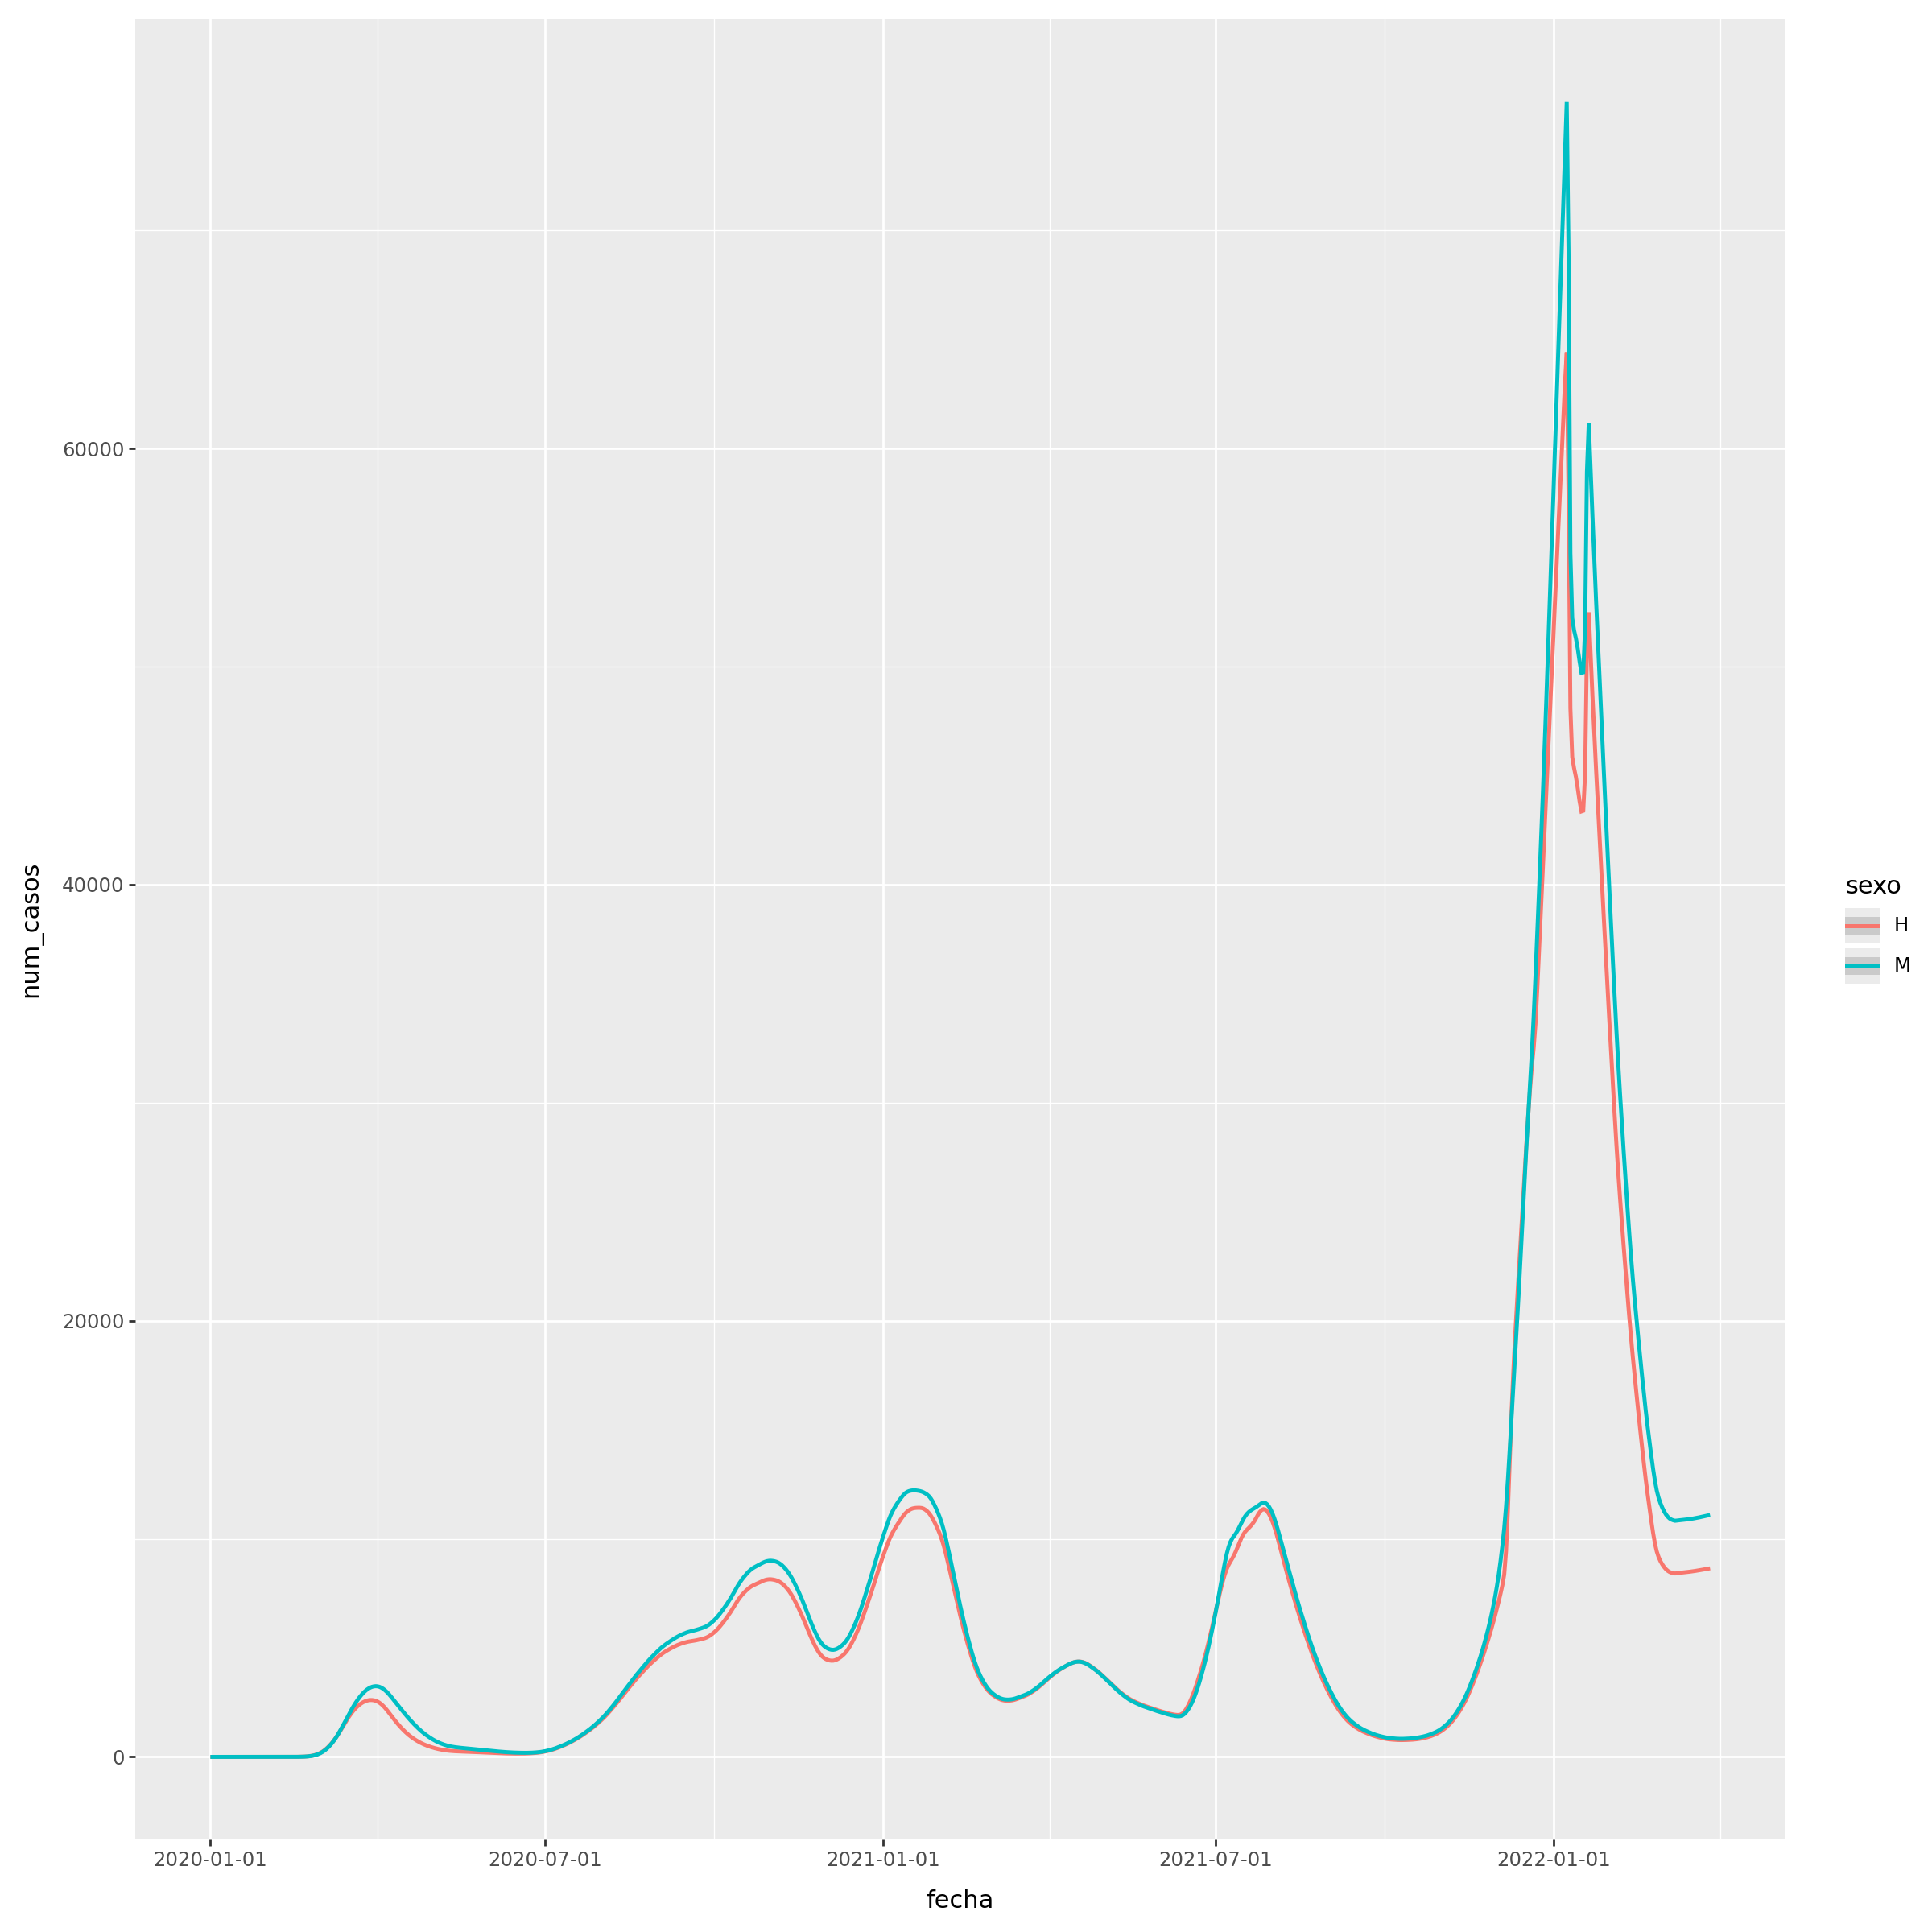

In [54]:
g

In [55]:
g.save('evolucion_contagios_covid_serietemporal.png')

c:\Users\pauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 12 x 12 in image.
c:\Users\pauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: evolucion_contagios_covid_serietemporal.png
c:\Users\pauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\pauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


c:\Users\pauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\pauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


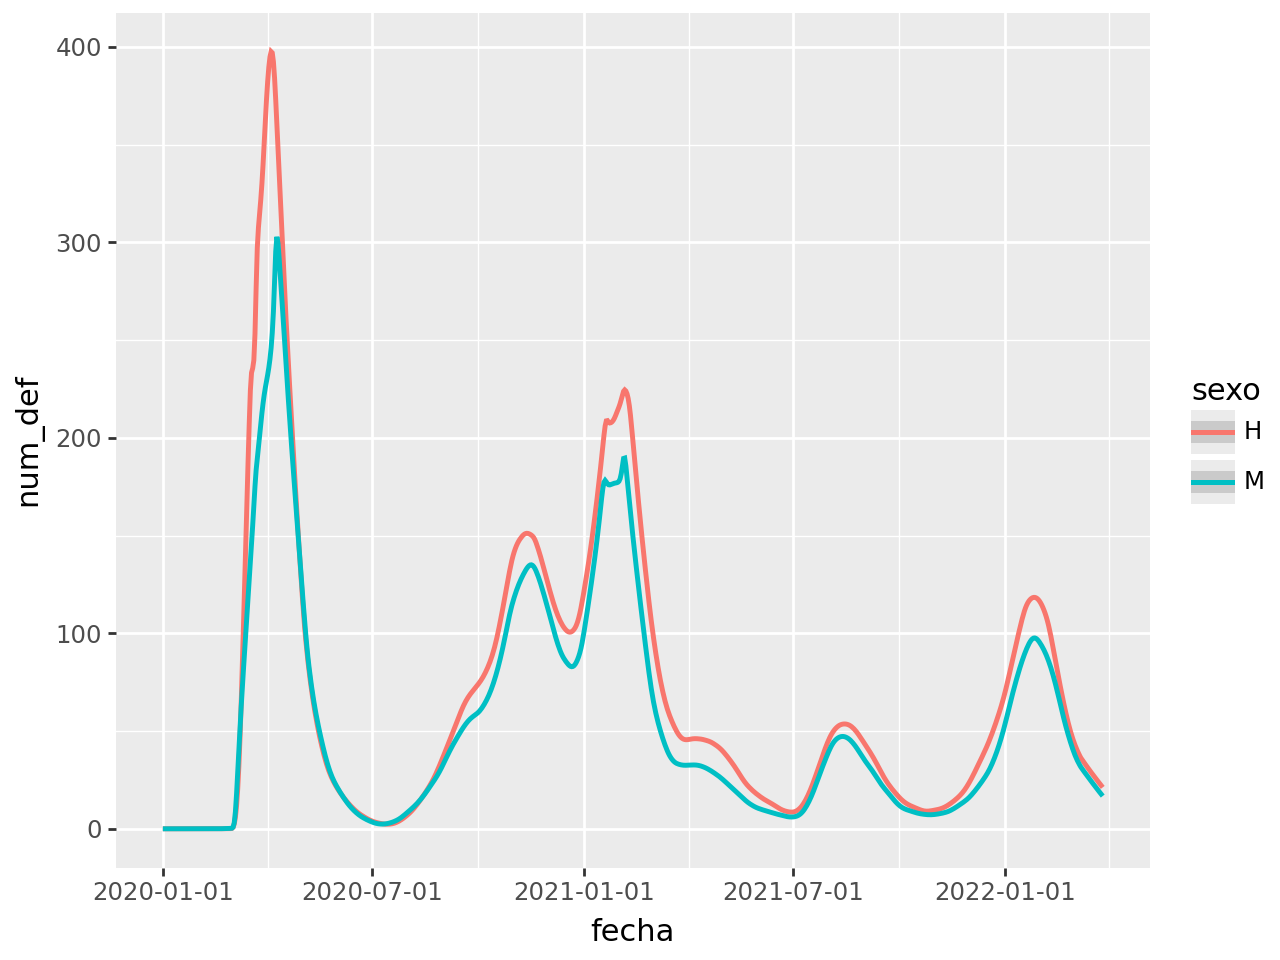

In [ ]:
# Plateamos número de defunciones
(
    ggplot(covid3)
    + aes( x= 'fecha',
          y = 'num_def',
          color='sexo')
    + geom_smooth(method='lowess', span=0.05) 
)